Ran stack_to_gsd() in  0.08812284469604492 for gsd with  7918 particles
Ran merge in  0.3644280433654785 for an image with shape  (1, 481, 480)
Ran remove objects in  0.016995906829833984 for an image with shape  (1, 481, 480)


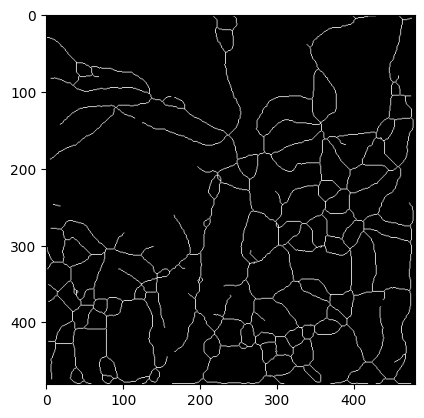

In [46]:
from StructuralGT import physical_networks
import numpy as np

options = {"Thresh_method":0, "gamma": 3, "md_filter": 0, "g_blur": 1, 
            "autolvl": 0,"fg_color":0,"laplacian": 0, "scharr": 0, "sobel":0 ,
            "lowpass": 1, "asize":7, "bsize":3, "wsize":5, "thresh": 103}

ANF = physical_networks.StructuralNetwork('ANF')
ANF.binarize(options_dict=options)
ANF.img_to_skel(merge_nodes=5, remove_objects=10)

import matplotlib.pyplot as plt
plt.imshow(ANF.skeleton, cmap='gray')
plt.show()

In [47]:
ANF.set_graph(sub=True)
betweennesses = np.asarray(ANF.graph.betweenness())/((ANF.graph.vcount()-1)**2)
ANF.graph.vs['betweenness'] = betweennesses

gsd_to_G canvas has shape  (481, 478)
pre sub has  264  nodes
post sub has  262  nodes


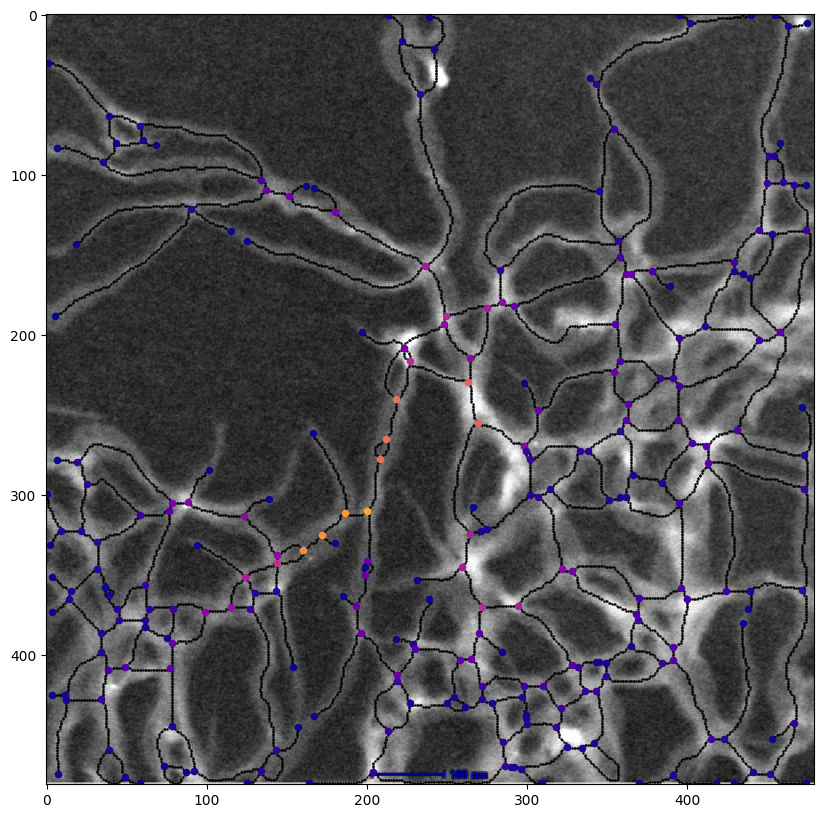

In [50]:
fig, ax = plt.subplots(figsize=(10,10))

plt.imshow(ANF.image_stack[0][0])
for edge in ANF.graph.es:
    ax.scatter(edge['pts'][:,1], edge['pts'][:,0], c='k', s=0.5)
    
for node in ANF.graph.vs:
    ax.scatter(node['o'][1], node['o'][0], c=node['betweenness'], s=20, vmax=0.25, vmin=0, cmap='plasma')
plt.show()

## AgNWN

In [58]:
import json
import cv2 as cv
_dir = 'AgNWN/1_175_6'
nw_diameter = 30e-9
nw_area = np.pi * nw_diameter**2 / 4
rho = 2.4e-8 # ohm m
R_j=12

f = open(_dir + '/params.json')
params = json.load(f)
rho_dim = rho / params['pix_per_m'] /  nw_area

g = physical_networks.ResistiveNetwork(_dir)
g.binarize()

#-----------------Finding centre crop-----------------#
img_bin = g.image_stack[0][0]
image_center = tuple(np.array(img_bin.shape[1::-1]) / 2)
short_length = img_bin.shape[img_bin.shape == max(img_bin.shape)]
long_length = max(img_bin.shape)
ISS = (short_length**2/2)**0.5
L1 = int((long_length - ISS)/2)
L3 = int(ISS+L1)
L2 = int((short_length - ISS)/2)
L4 = int(ISS+L2)
o_corn_crop = np.asarray([L2,L4,L1,L3], dtype=int)
dims = L2-L1
#-----------------------------------------------------#

O_eff = []
thetas = np.linspace(0,350,36)
for theta in thetas:
    g.img_to_skel(crop=o_corn_crop, rotate=theta)
    g.set_graph(weight_type=['FixedWidthConductance'], rho_dim=rho_dim, R_j=12) 
    g.potential_distribution(0, [0,50], [ISS-50,ISS], R_j=R_j)
    g.Node_labelling(g.P, 'Potential', 'labelled.gsd')
    O_eff.append(g.effective_resistance())


Ran stack_to_gsd() in  1.3933732509613037 for gsd with  217630 particles
gsd_to_G canvas has shape  (1764, 1765)
pre sub has  11515  nodes
post sub has  11228  nodes
Graph has max  [1248.0, 1248.0]
source coord is  [-10 624]
sink coord is  [1258  624]
Before connecting external nodes, G has vcount  5724
False  connected
After connecting external nodes, G has vcount  5724


implicit data copy when writing chunk: log/particles/Potential


Ran stack_to_gsd() in  1.4300360679626465 for gsd with  217630 particles
gsd_to_G canvas has shape  (1764, 1765)
pre sub has  11515  nodes
post sub has  11228  nodes
Graph has max  [1247.6925579305616, 1247.7586357825642]
source coord is  [-10 623]
sink coord is  [1257  623]
Before connecting external nodes, G has vcount  5560
False  connected
After connecting external nodes, G has vcount  5560


implicit data copy when writing chunk: log/particles/Potential


Ran stack_to_gsd() in  1.4281389713287354 for gsd with  217630 particles
gsd_to_G canvas has shape  (1764, 1765)
pre sub has  11515  nodes
post sub has  11228  nodes
Graph has max  [1247.379789174785, 1247.4831410315]
source coord is  [-10 623]
sink coord is  [1257  623]
Before connecting external nodes, G has vcount  5466
False  connected
After connecting external nodes, G has vcount  5466


KeyboardInterrupt: 

0